# Tarea semana 05
## Oscilador Armónico
## Realizado por: Javier Fernández y Kaled Sequeira 
Objetivos
1. Estudiar los diferentes regímenes de amortiguamiento para un Oscilador Armónico Amortiguado.
2. Estudiar el comportamiento caótico de un péndulo físico.


# Oscilador armónico amortiguado 
Considerando el sistema de ecuaciones de primer orden, para el movimiento de oscilador amortiguado:
\begin{align}
\begin{cases}
    \dot \omega &= -\dfrac{g}{l}\theta -q\omega\\
    \dot \theta &= \omega
\end{cases}
\end{align}
Sabiendo que el comportamiento del sistema se agrupa en tres regímenes de acuerdo a los valores del parámetro de amortiguamiento $q$: régimen subamortiguado, régimen críticamente amortiguado y régimen sobreamortiguado.

Mediante la solución numérica de las ecuaciones de movimiento del sistema, puede
explorarse el comportamiento del oscilador amortiguado para distintos valores de $q$.


In [1]:
# Sección 1, solución numérica del sistema usando solve_ivp()
# Se importan las librerías necesarias
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('classic')


# Parámetros y condiciones iniciales

g = 9.81         # aceleración de la gravedad terrestre
l = 1.           # longitud del péndulo
#p = (g, l)      # tupla de parámetros
Omega = np.sqrt(g/l)

phi = np.pi/2    # ángulo de fase
theta_0 = 1.     # Amplitud
theta = 1.       # Ángulo inicial
omega = 0.       # Rapidez angular inicial

t_i = 0.         # Instante inicial
t_f = 10.        # Instante final

# Se define la ecuación del movimiento del sistema
def OA_Amortiguado(t, estado, g, l, q):
    """
    Función que calcula la dinámica del movimiento del oscilador amortiguado,
    considerando el amortiguamiento q.
    """
    theta, omega = estado #Estado en función de theta y omega
    
    domega = -(g/l)*theta - q*omega # Sistema de ecuaciones dado al inicio
    dtheta = omega
    
    return [dtheta, domega] # Evolución del estado


Definición de la solución numérica

In [2]:
# Sección 2, se definen los parámetros usados anteriormente
# Condiciones iniciales del sistema
cond_iniciales = [theta, omega]

# Intervalo temporal
t_span = (t_i,t_f)
t_eval = np.arange(t_i,t_f,0.1)

#Distintos valores de q, variación del parámetro según se solicita en el enunciado
q_values = np.arange(0,12,0.1)

#Solución usando solve_ivp()
result_solve_ivp = {}
for q in q_values:
  p=(g,l,q)
  result_solve_ivp[q] = solve_ivp(OA_Amortiguado, t_span, y0=cond_iniciales, t_eval=t_eval, args=p)


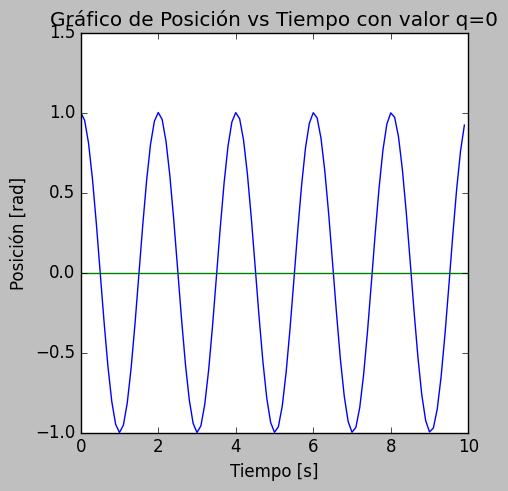

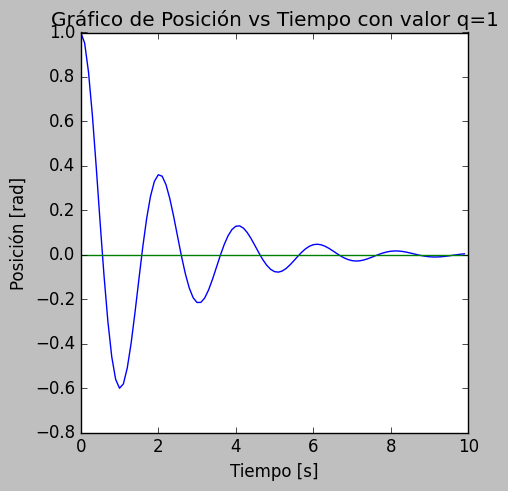

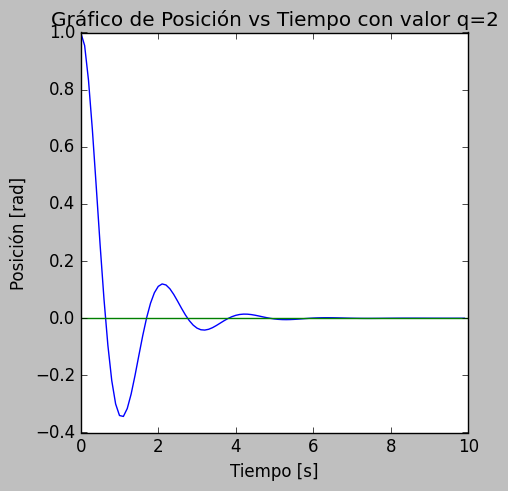

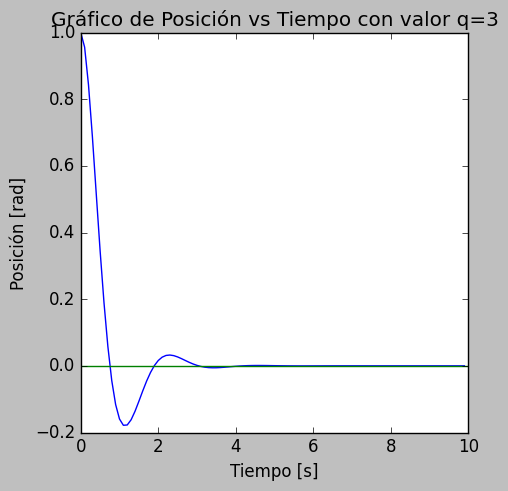

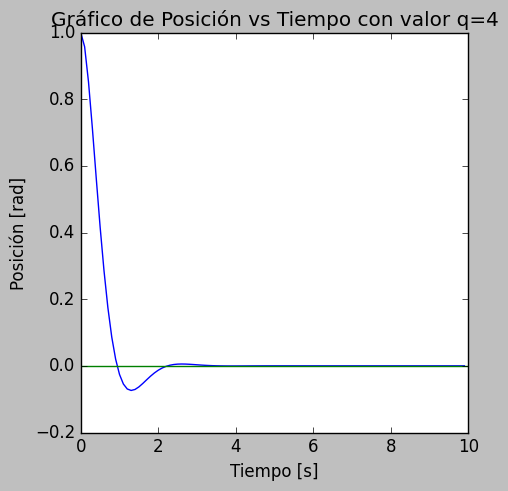

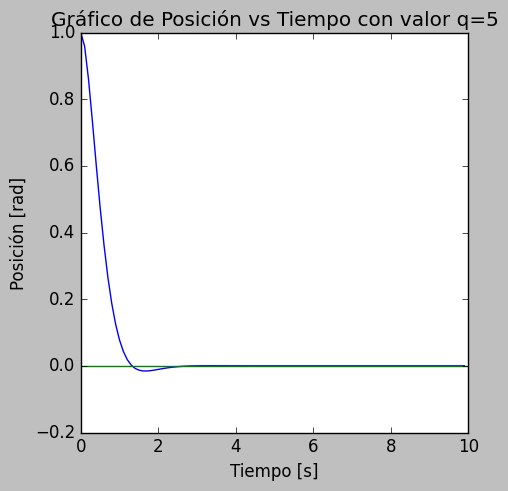

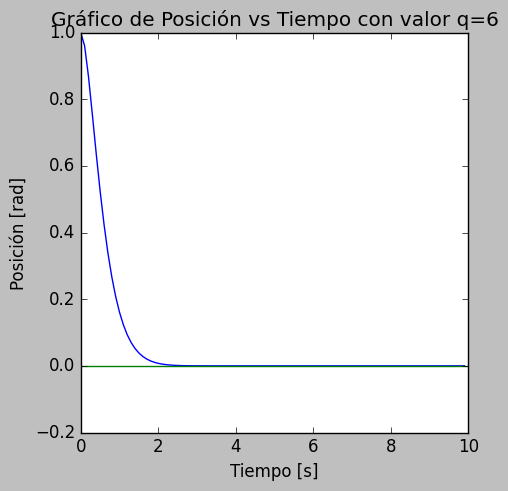

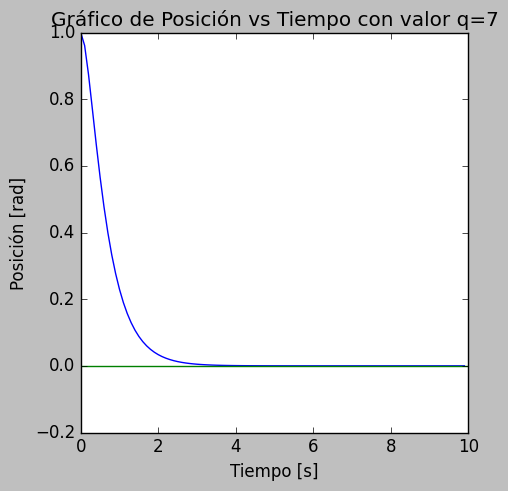

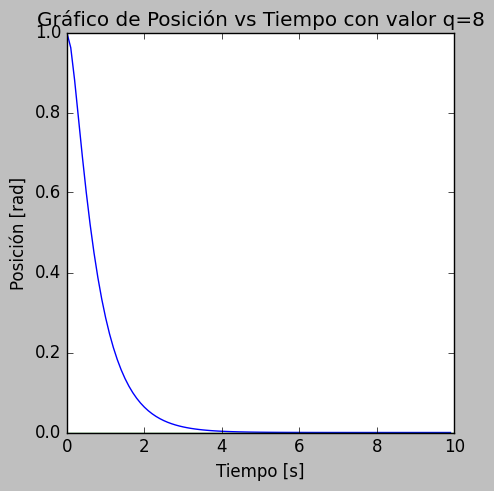

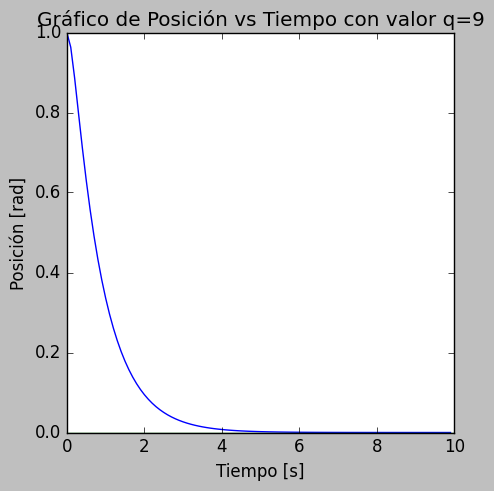

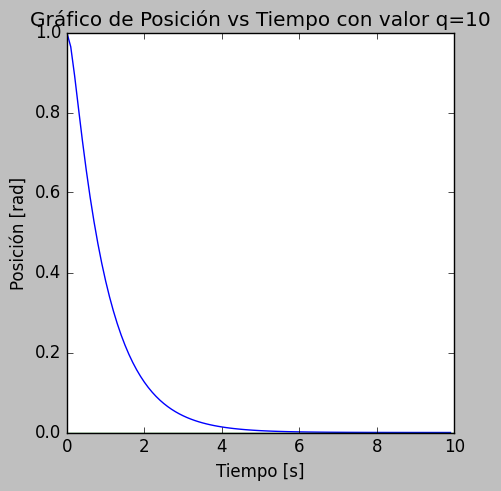

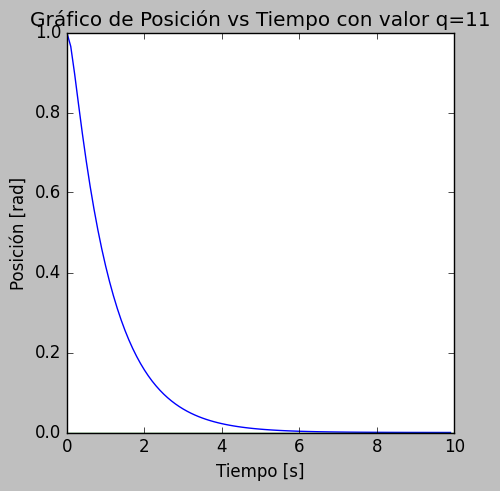

In [3]:
# Sección 3, solución numérica para el sistema con distintos valores de q
# Solución numérica del sistema para distintos valores de q
for q in np.arange(0,12,1):
  fig, ax = plt.subplots(figsize=(5,5), dpi=100)
  plt.plot(t_eval,result_solve_ivp[q].y[0,:])
  plt.plot((t_i,t_f),(0,0))
  plt.title("Gráfico de Posición vs Tiempo con valor q="+str(q))
  plt.xlabel("Tiempo [s]")
  plt.ylabel("Posición [rad]")
  plt.style.use('classic')
  plt.show()

Se observa que el q crítico está alrededor del valor $q=6$. 

### Sección 4


En general se cumple que: 
\begin{align}
\begin{cases}
    \omega_0 ^2 > \beta^2 & \text{Subamortiguado}\\
    \omega_0 ^2 = \beta^2 &  \text{Crítico}\\
    \omega_0 ^2 < \beta^2 & \text{Sobreamortiguado}
\end{cases}
\end{align}

Para estos se tiene según la notación del Marion:
\begin{align}
\begin{cases}
    \omega_0 ^2 = \frac{g}{l}\\
    \beta = \frac{q}{2} 
\end{cases}
\end{align}

El valor crítico de $q$ corresponde a 
\begin{equation}
  q = \sqrt{\frac{4g}{l}}
\end{equation}

In [4]:
# Sección 5, Comparar el valor de q crítico con el resultado analítico
# Cálculo correspondiente el valor crítico del resultado analítico de q
q_crit = np.sqrt(4*g/l)
print(q_crit)

6.26418390534633


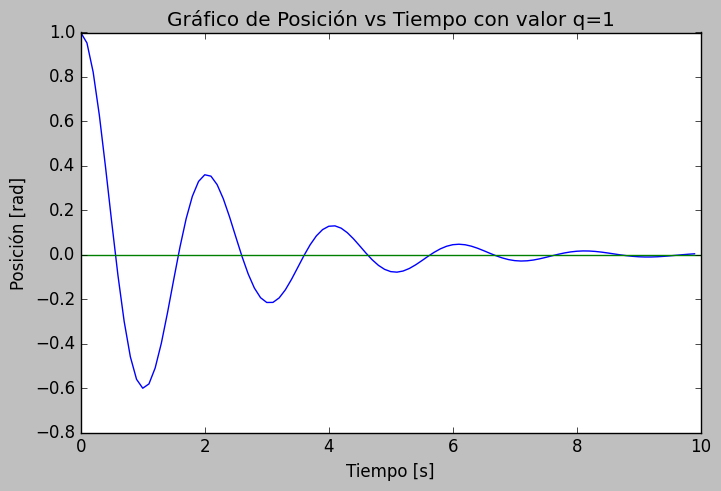

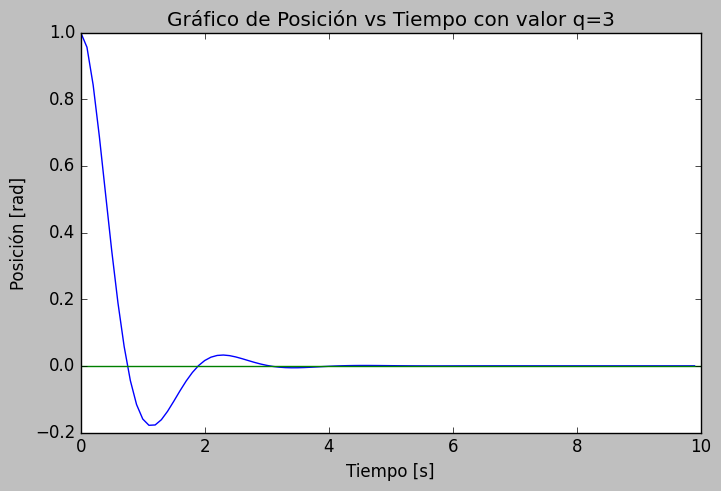

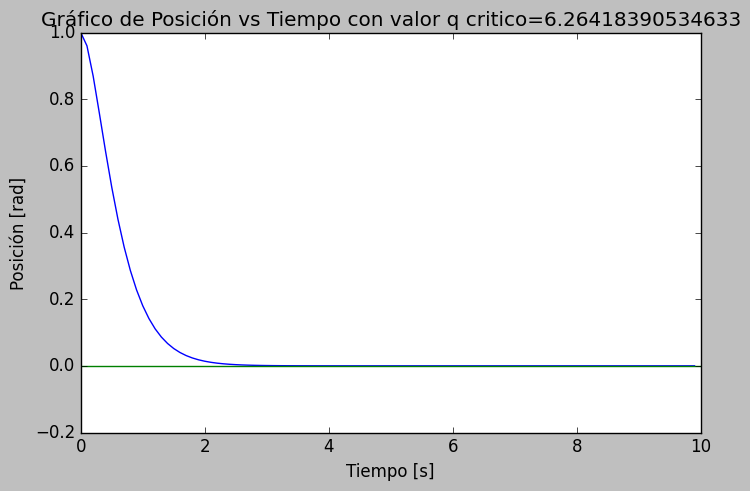

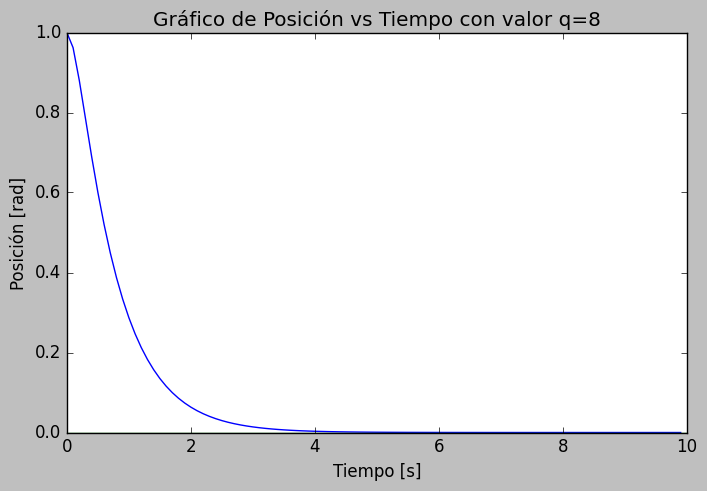

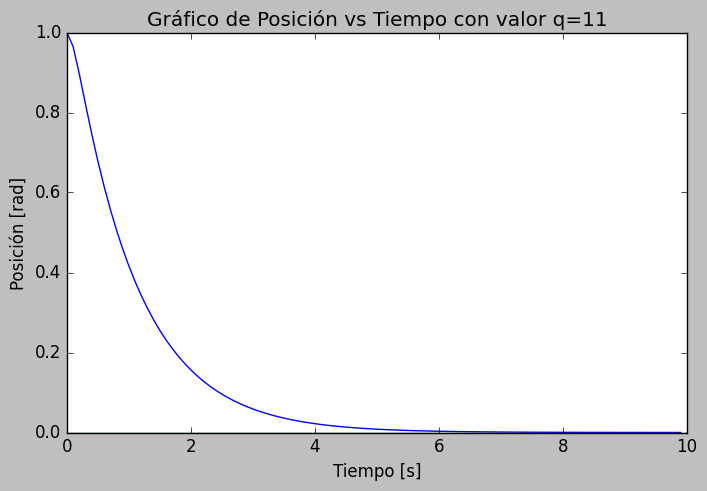

In [5]:
# Sección 6
# Gráficas de theta vs tiempo para el comportamiento del sistema en q crítico, dos valores subamortiguados y dos sobreamortiguados
q_test = [1, 3, q_crit, 8, 11] # Valores de q establecidos para la prueba

for q in q_test: # Se recorren los valores del q_test para los valores de q establecidos
  p=(g,l,q)
  result_solve_ivp[q] = solve_ivp(OA_Amortiguado, t_span, y0=cond_iniciales, t_eval=t_eval, args=p)

# Solución numérica del sistema para distintos valores de q
for q in q_test:
  fig, ax = plt.subplots(figsize=(8,5), dpi=100)
  plt.plot(t_eval,result_solve_ivp[q].y[0,:])
  plt.title("Gráfico de Posición vs Tiempo con valor q="+str(q))
  plt.plot((t_i,t_f),(0,0))
  if q == q_crit: # Se crea un if para identificar el valor crítico en la lista y mejorar el título de la gráfica
    plt.title("Gráfico de Posición vs Tiempo con valor q critico=" +str(q_crit))
  plt.style.use('classic')
  plt.xlabel("Tiempo [s]")
  plt.ylabel("Posición [rad]")
  plt.show()

### Sección 7
El comportamiento del sistema mostrado en las gráficas anteriores corresponde a un sistema de un oscilador armónico amortiguado. El efecto del parámetro de amortiguamiento en el oscilador resulta similar a un ahogamiento de la gráfica, donde se sobrepone la función exponencial que acompaña a la función sinusoidal. La ecuación está dada por:
\begin{equation}
  \theta(t) = \theta_0 e^{\frac{-qt}{2}} \sin{\left(\sqrt{\Omega^2 - \frac{q^2}{4}} t+\phi\right)}
\end{equation}

- Conforme aumenta el valor de $q$ aumenta el amortiguamiento. El caso de subamortiguamiento resulta en un movimiento oscilatorio que decrementa en el rango de la función exponencial. 

- Para un sistema críticamente amortiguado se tiene la condición que, si la fuerza de amortiguamiento es lo suficientemente grande, se previene que el sistema entre en un movimiento oscilatorio. El oscilador amortiguado se acerca al equilibrio lo más rápido posible, esto por encima de un sistema subamortiguado y sobreamortiguado.

- El movimiento sobreamortiguado resulta en un decremento de la amplitud del movimiento a cero. Se posee un comportamiento asintótico y tarda más en entrar en equilibrio que un sistema críticamente amortiguado 

# Diagramas de Poincaré del Péndulo físico

Considerando el sistema de ecuaciones 

\begin{align}
\begin{cases}
    \dot \omega &= -\dfrac{g}{l}\sin\theta -q\omega + F_D \sin{(\Omega_D \cdot t)}\\
    \dot \theta &= \omega
\end{cases}
\end{align}

In [6]:
# Sección 2
# Se importan las librerías necesarias
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parámetros y condiciones iniciales (tomadas del Giordano cap3.3)

g = 9.81         # aceleración de la gravedad terrestre
l = g           # longitud del péndulo
Omega = np.sqrt(g/l)

phi = np.pi/2    # ángulo de fase
theta_0 = 1.     # Amplitud
theta = 0.2       # Ángulo inicial
omega = 0.       # Rapidez angular inicial

t_i = 0.         # Instante inicial
t_f = 60.       # Instante final

# Se define la ecuación del movimiento del sistema
def OA_Amortiguado_FuerzaExterna(t, estado, g, l, q, f_D, Omega_D):
    """
    Función que calcula la dinámica del movimiento del oscilador amortiguado,
    considerando el amortiguamiento q y la fuerza externa.
    """
    theta, omega = estado #Estado en función de theta y omega
    
    domega = -(g/l)*np.sin(theta) - q*omega + f_D * np.sin(Omega_D * t) # Sistema de ecuaciones dado
    dtheta = omega
    
    return [dtheta, domega] # Evolución del estado

Definición de la solución numérica, considerando $F_D=0.5$

In [7]:
# Condiciones iniciales del sistema
cond_iniciales = [theta, omega]

# Intervalo temporal
t_span = (t_i,t_f)
t_eval = np.arange(t_i,t_f,0.04)

# Parámetros
q = 0.5
f_D = 0.5
Omega_D = 2/3

p=(g,l,q,f_D,Omega_D)

result_solve_ivp_F=solve_ivp(OA_Amortiguado_FuerzaExterna,t_span,y0=cond_iniciales,t_eval=t_eval,args=p)
result_solve_ivp_F

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  4.000e-02 ...  5.992e+01  5.996e+01]
        y: [[ 2.000e-01  1.998e-01 ...  8.655e-01  8.643e-01]
            [ 0.000e+00 -7.601e-03 ... -2.379e-02 -3.819e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 386
     njev: 0
      nlu: 0

Luego, se grafica el comportamiento del Oscilador Armónico Amortiguado en posición vs tiempo, y el diagrama de fase

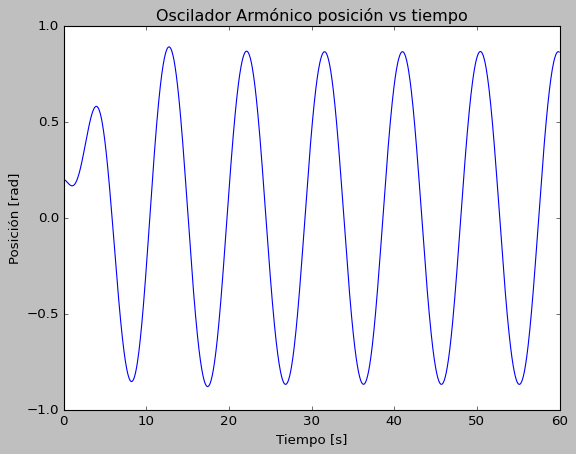

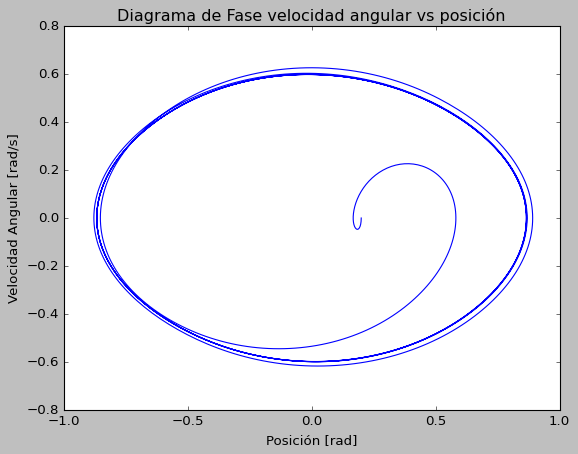

In [8]:
# Gráfica de posición vs tiempo

plt.plot(t_eval,result_solve_ivp_F.y[0,:])
plt.title("Oscilador Armónico posición vs tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Posición [rad]")
plt.show()


# Gráfica de velocidad angular vs posición

plt.plot(result_solve_ivp_F.y[0,:],result_solve_ivp_F.y[1,:])
plt.title("Diagrama de Fase velocidad angular vs posición")
plt.xlabel("Posición [rad]")
plt.ylabel("Velocidad Angular [rad/s]")
plt.show()


Para el diagrama de Poincaré, se definen los tiempos a tomar en cuenta como aquellos que cumplen la relación 
$$
\Omega _D \cdot t = 2 \pi \cdot n
$$

donde $n$ es un número entero. Así, se despeja tal que:
$$
t=\frac{2 \pi n}{\Omega_D}
$$

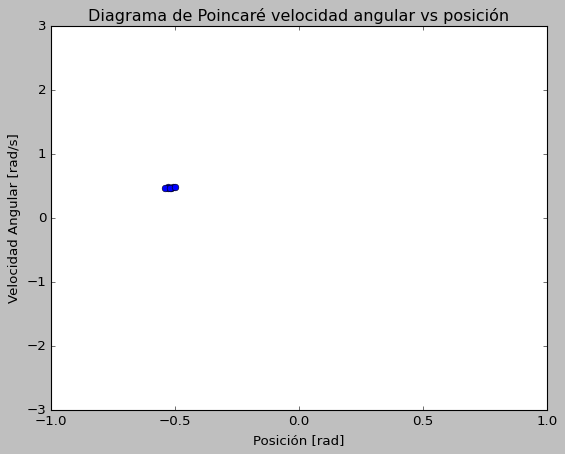

In [9]:
# Diagrama de Poincare

t_values=result_solve_ivp_F.t

t_poincare = (2*np.pi) / Omega_D
n_max = int(t_f/t_poincare)
theta_poincare = []
omega_poincare = []

for n in range(1,n_max):
  for i in range(len(t_values)):
    if np.isclose(t_values[i],n*t_poincare,rtol=0.001):
        
      theta_poincare.append(result_solve_ivp_F.y[0][i])
      omega_poincare.append(result_solve_ivp_F.y[1][i])
    

plt.plot(theta_poincare,omega_poincare,"o")
plt.ylim([-3,3])
plt.xlim([-1,1])
plt.title("Diagrama de Poincaré velocidad angular vs posición")
plt.xlabel("Posición [rad]")
plt.ylabel("Velocidad Angular [rad/s]")
plt.show()




Como se observa en el diagrama de Poincaré, los puntos tomados para los tiempos se asemejan mucho entre sí, por lo que corresponden a un comportamiento armónico, no caótico, donde cada intervalo de tiempo $2\pi / \Omega$, se obtiene un mismo valor de rapidez angular para la posición dada.
Ello se debe a que, junto a la fuerza externa, el sistema se encuentra oscilando ordenadamente en el tiempo.

## Fuerza D 1.2
Ahora se aplica con la fuerza $F_D=1.2$

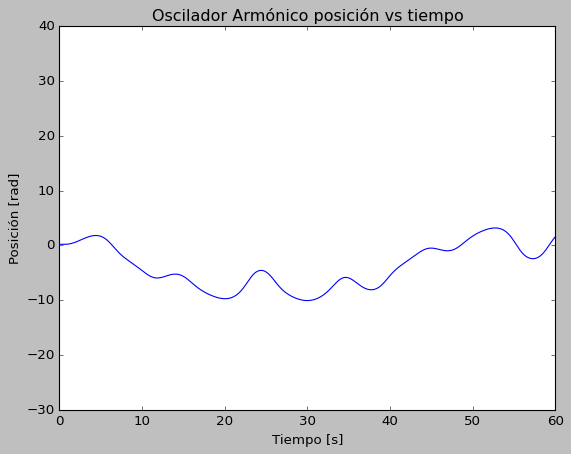

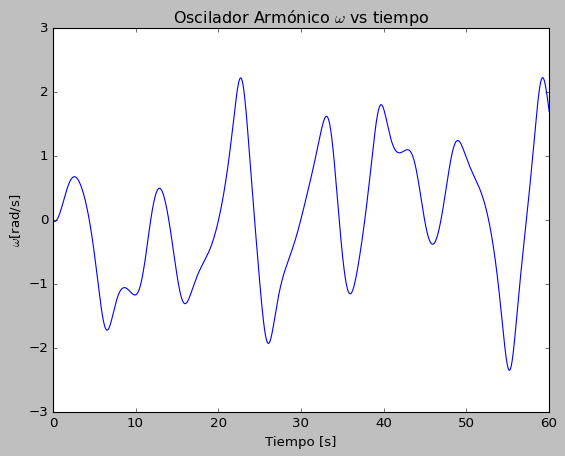

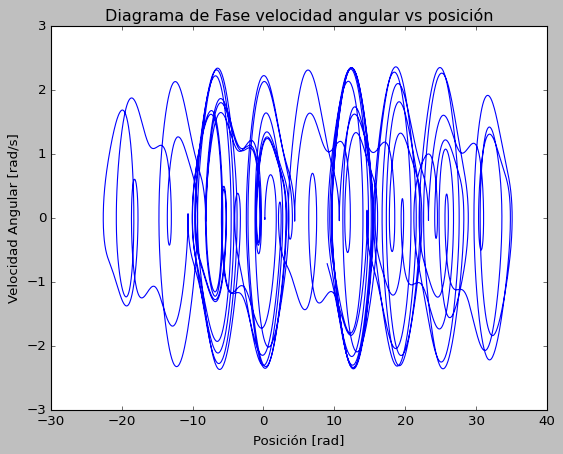

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-. 
   Rango Modificado de posicion de -pi a pi
 -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.


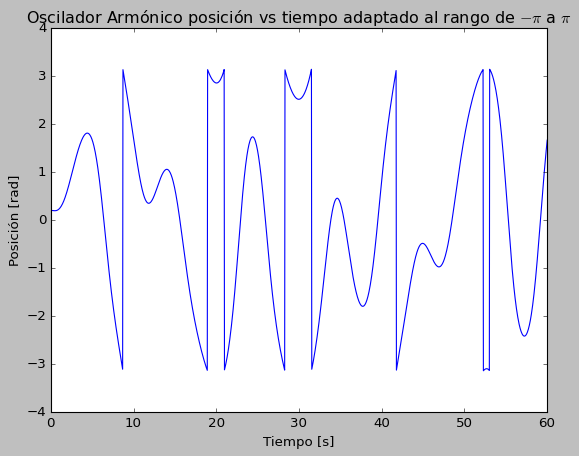

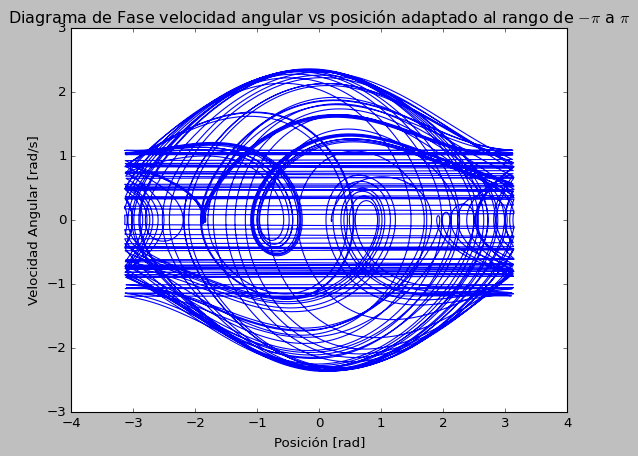

In [10]:
# Parámetros y condiciones iniciales (tomadas del Giordano cap3.3)

g = 9.81         # aceleración de la gravedad terrestre
l = g           # longitud del péndulo
Omega = np.sqrt(g/l)

phi = np.pi/2    # ángulo de fase
theta_0 = 0.2     # Amplitud
theta = 0.2       # Ángulo inicial
omega = 0.       # Rapidez angular inicial

t_i = 0.         # Instante inicial
t_f = 500.       # Instante final

# Condiciones iniciales del sistema
cond_iniciales = [theta, omega]

# Intervalo temporal
t_span = (t_i,t_f)
t_eval = np.arange(t_i,t_f,0.04)

# Parámetros
q = 0.5
Omega_D = 2/3
f_D2 = 1.2

p2=(g,l,q,f_D2,Omega_D)


# Resultados de la fuerza F=1.2

result_solve_ivp_F2=solve_ivp(OA_Amortiguado_FuerzaExterna,t_span,y0=cond_iniciales,t_eval=t_eval,args=p2,method="LSODA")


# Convertir a rango de -pi a pi

posicionRango=[]
for th in result_solve_ivp_F2.y[0]:
    while th > np.pi:
        th -= 2 * np.pi
    while th < -np.pi:
        th += 2 * np.pi
    posicionRango.append(th)


# Gráfica de posición vs tiempo sin modificar

plt.plot(t_eval,result_solve_ivp_F2.y[0,:])
plt.title("Oscilador Armónico posición vs tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Posición [rad]")
plt.xlim([0,60])
plt.show()

# Gráfica de Velocidad angular vs tiempo

plt.plot(t_eval,result_solve_ivp_F2.y[1,:])
plt.title("Oscilador Armónico $\\omega$ vs tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("$\\omega$[rad/s]")
plt.xlim([0,60])
plt.show()

# Gráfica de velocidad angular vs posición
plt.plot(result_solve_ivp_F2.y[0],result_solve_ivp_F2.y[1])
plt.title("Diagrama de Fase velocidad angular vs posición")
plt.xlabel("Posición [rad]")
plt.ylabel("Velocidad Angular [rad/s]")
plt.show()


print(25*"-.","\n   Rango Modificado de posicion de -pi a pi\n",25*"-.")


# Gráfica de posición vs tiempo modificado

plt.plot(t_eval,posicionRango)
plt.title("Oscilador Armónico posición vs tiempo adaptado al rango de $-\\pi$ a $\\pi$")
plt.xlabel("Tiempo [s]")
plt.ylabel("Posición [rad]")
plt.xlim([0,60])
plt.show()
# Gráfica de velocidad angular vs posición modificado
plt.plot(posicionRango,result_solve_ivp_F2.y[1])
plt.title("Diagrama de Fase velocidad angular vs posición adaptado al rango de $-\\pi$ a $\\pi$")
plt.xlabel("Posición [rad]")
plt.ylabel("Velocidad Angular [rad/s]")
plt.show()



Se observa en el diagrama

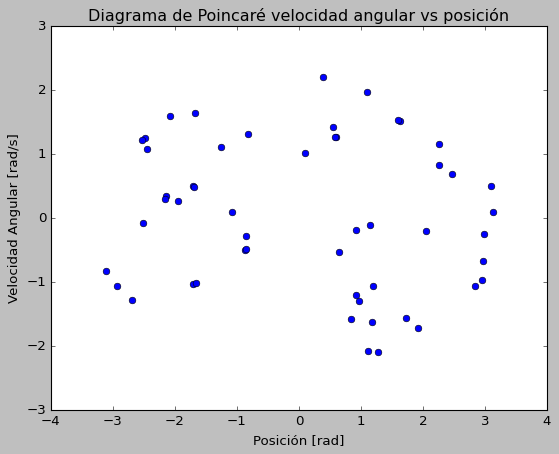

In [11]:

# Diagrama de Poincare

t_poincare = (2*np.pi) / Omega_D
n_max = int(t_f/t_poincare)

t_values2=result_solve_ivp_F2.t
theta_poincare2 = []
omega_poincare2 = []



for n in range(1,n_max):
    run=True
    i=0
    while i<=len(t_values2) and run==True:
        #print(n,".",i)
        if np.isclose(t_values2[i],n*t_poincare,rtol=0.1):

          # theta_poincare2.append(result_solve_ivp_F2.y[0][i])
          theta_poincare2.append(posicionRango[i])
          omega_poincare2.append(result_solve_ivp_F2.y[1][i])
          run=False
        i += 1
    

plt.plot(theta_poincare2,omega_poincare2,"o")
plt.title("Diagrama de Poincaré velocidad angular vs posición")
plt.xlabel("Posición [rad]")
plt.ylabel("Velocidad Angular [rad/s]")
plt.show()

Como se puede observar en el diagrama de Poincaré, cuando el sistema se somete a una fuerza externa igual a $1.2$, presenta un comportamiento caótico, ya que el sistema no sigue ninguna periodicidad.